Epoch 0, Loss: 0.14476747810840607
Epoch 100, Loss: 0.00022612125030718744
Epoch 200, Loss: 5.057916132500395e-05
Epoch 300, Loss: 1.589382554811891e-05
Epoch 400, Loss: 1.0004341675085016e-05
Epoch 500, Loss: 8.490963409713004e-06
Epoch 600, Loss: 7.783980436215643e-06
Epoch 700, Loss: 7.252907380461693e-06
Epoch 800, Loss: 6.778864644729765e-06
Epoch 900, Loss: 6.34899697615765e-06


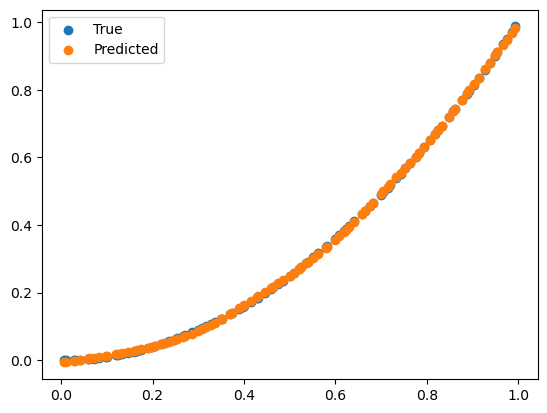

In [2]:
from scipy.stats.qmc import LatinHypercube
import numpy as np

d = 1 # 차원 수
n = 100 # 샘플 수

lhd = LatinHypercube(d)
samples = lhd.random(n)

# 예시 함수 (실제 문제에 맞게 변경)
def target_function(x):
    return x**2

y_samples = np.array([target_function(x) for x in samples])

import torch
import torch.nn as nn
from torchdiffeq import odeint

class NeuralODE(nn.Module):
    def __init__(self):
        super(NeuralODE, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )

    def forward(self, t, y):
        return self.net(y)

# 데이터
X_train = torch.tensor(samples, dtype=torch.float32)
y_train = torch.tensor(y_samples, dtype=torch.float32)

# 모델 및 최적화
model = NeuralODE()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# 훈련
for epoch in range(1000):
    y_pred = odeint(model, X_train, torch.tensor([0, 1], dtype=torch.float32))[-1]
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')
        
# 예측
y_test = odeint(model, X_train, torch.tensor([0, 1], dtype=torch.float32))[-1]

# 검증 (그래프)
import matplotlib.pyplot as plt

plt.scatter(X_train.numpy(), y_train.numpy(), label='True')
plt.scatter(X_train.numpy(), y_test.detach().numpy(), label='Predicted')
plt.legend()
plt.show()
